# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_5_SPN_FS_LTS")
network_file = os.path.join(network_path, "network-synapses.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_5A.hdf5")
# simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_5A.hdf5")
duration = 18

# Local path for Snudda data
snudda_data = "/home/hjorth/HBP/BasalGangliaData/data"

# Plot network

In this particular example with SPN, FS and LTS we do not use the population units.

Population unit 0 has 31998 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 31998 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


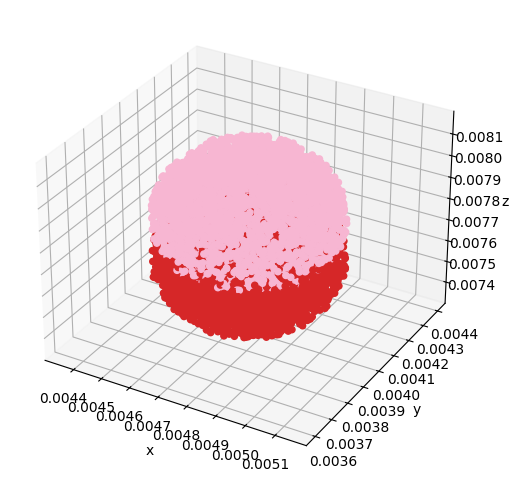

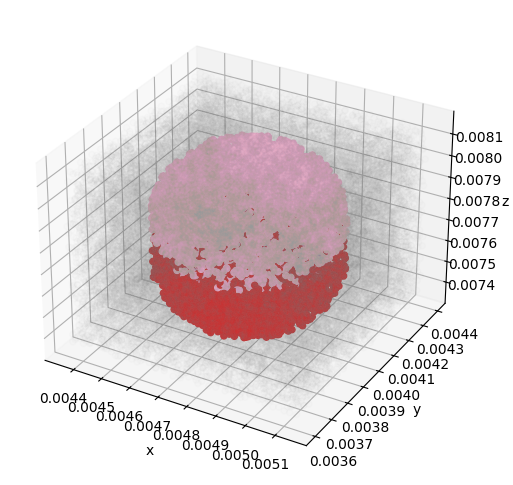

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path, snudda_data=snudda_data)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")

spi = PlotInput(input_file, network_file)

spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="FS", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="LTS", fig_size=(15,5))

In [3]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [4]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_5_SPN_FS_LTS/simulation/output-with-synapses-sten_5A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
238: (LTS_0, p94d54b1c, m803558b5)
239: (LTS_0, p8c493214, m803558b5)
240: (LTS_1, pbae91695, ma4dacccf)
249: (dSPN_0, p7aa400d6, m37886c78)
262: (dSPN_0, pb0529fb9, mc710c1a4)
272: (dSPN_0, p8bf90d1f, mf702205f)
273: (dSPN_0, pb0529fb9, mbb8e5b24)
572: (LTS_0, p7f931884, m803558b5)
573: (LTS_1, pe675a3d7, m872fbb26)
574: (LTS_1, p54dfea77, m8ded5e00)
579: (dSPN_0, p8bf90d1f, m9fda9b20)
595: (dSPN_0, pb0529fb9, mf702205f)
600: (dSPN_0, pe6ec2d4b, mf702205f)
849: (LTS_0, padd48e2a, m803558b5)
850: (LTS_0, p119533eb, m803558b5)
851: (LTS_0, p8c493214, m803558b5)
855: (dSPN_0, p7aa400d6, m9fda9b20)
861: (dSPN_0, p7aa400d6, m37886c78)
872: (dSPN_0, p1863c9a5, mc710c1a4)
878: (dSPN_0, pb0529fb9, m9fda9b20)
883: (dSPN_0, p7aa400d6, mf702205f)
1125: (LTS_1, p3f21fd29, mf4ba6a4e)
1130: (dSPN_0, p7aa400d6, mc710c1a4)
1144:

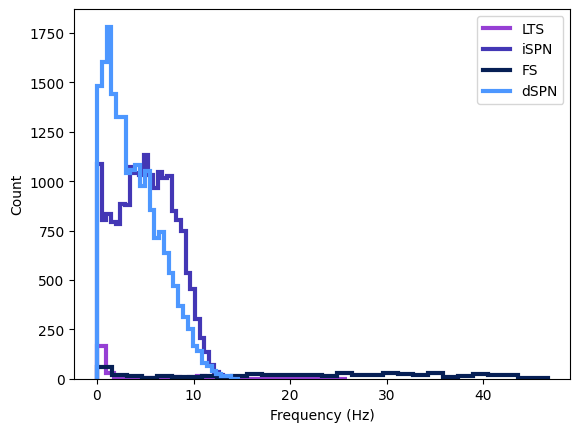

In [5]:
spr.plot_firing_frequency_distribution(bins=30)

spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

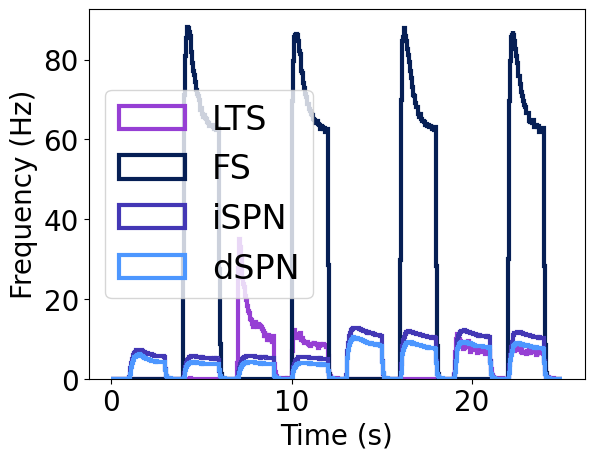

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [6]:
spr.plot_spike_histogram_type(neuron_type=["dSPN", "iSPN", "FS", "LTS"])

# Summarising difference in activity (with and without lateral inhibition)

ax = spr.plot_spike_histogram_type(neuron_type=["dSPN", "iSPN", "FS", "LTS"], label_text="lateral inhibition ", show_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram_type(ax=ax, neuron_type=["dSPN", "iSPN", "FS", "LTS"], label_text="no inhibition ", show_figure=True, fig_file="spike-histogram-SPN-FS-LTS")

In [8]:
time_ranges = [(1,3), (4,6), (7,9), (10,12), (13,15), (16,18), (19,21), (22,24)]

dspn_id = spr.snudda_load.get_neuron_id_of_type("dSPN")
ispn_id = spr.snudda_load.get_neuron_id_of_type("iSPN")
fs_id = spr.snudda_load.get_neuron_id_of_type("FS")
lts_id = spr.snudda_load.get_neuron_id_of_type("LTS")


with_lat_freq_table_dspn = spr.snudda_simulation_load.get_frequency(neuron_id=dspn_id, time_ranges=time_ranges)
with_lat_freq_table_ispn = spr.snudda_simulation_load.get_frequency(neuron_id=ispn_id, time_ranges=time_ranges)
with_lat_freq_table_fs = spr.snudda_simulation_load.get_frequency(neuron_id=fs_id, time_ranges=time_ranges)
with_lat_freq_table_lts = spr.snudda_simulation_load.get_frequency(neuron_id=lts_id, time_ranges=time_ranges)


In [9]:
with_lat_freq_dspn_mean = np.mean(with_lat_freq_table_dspn, axis=0)
with_lat_freq_ispn_mean = np.mean(with_lat_freq_table_ispn, axis=0)
with_lat_freq_fs_mean = np.mean(with_lat_freq_table_fs, axis=0)
with_lat_freq_lts_mean = np.mean(with_lat_freq_table_lts, axis=0)

n_dspn_cells = with_lat_freq_table_dspn.shape[0]
n_ispn_cells = with_lat_freq_table_ispn.shape[0]
n_fs_cells = with_lat_freq_table_fs.shape[0]
n_lts_cells = with_lat_freq_table_lts.shape[0]


# Standard error of the mean
with_lat_freq_dspn_std = np.std(with_lat_freq_table_dspn, axis=0) / np.sqrt(n_dspn_cells)
with_lat_freq_ispn_std = np.std(with_lat_freq_table_ispn, axis=0) / np.sqrt(n_ispn_cells)
with_lat_freq_fs_std = np.std(with_lat_freq_table_fs, axis=0) / np.sqrt(n_fs_cells)
with_lat_freq_lts_std = np.std(with_lat_freq_table_lts, axis=0) / np.sqrt(n_lts_cells)

In [10]:
print("With lateral inhibition")
for freq_dspn_mean, freq_dspn_std, freq_ispn_mean, freq_ispn_std, freq_fs_mean, freq_fs_std, freq_lts_mean, freq_lts_std in zip(with_lat_freq_dspn_mean, with_lat_freq_dspn_std, with_lat_freq_ispn_mean,with_lat_freq_ispn_std,with_lat_freq_fs_mean,with_lat_freq_fs_std, with_lat_freq_lts_mean, with_lat_freq_lts_std):
    print(f"Freq dSPN: {freq_dspn_mean:.2f} +/- {freq_dspn_std:.2f}\tFreq iSPN: {freq_ispn_mean:.2f} +/- {freq_ispn_std:.2f}\tFreq FS: {freq_fs_mean:.2f} +/- {freq_fs_std:.2f}  \tFreq LTS: {freq_lts_mean:.2f} +/- {freq_lts_std:.2f}")

With lateral inhibition
Freq dSPN: 4.61 +/- 0.03	Freq iSPN: 5.95 +/- 0.03	Freq FS: 0.00 +/- 0.00  	Freq LTS: 0.00 +/- 0.00
Freq dSPN: 3.60 +/- 0.02	Freq iSPN: 4.95 +/- 0.02	Freq FS: 69.79 +/- 1.79  	Freq LTS: 0.00 +/- 0.00
Freq dSPN: 3.61 +/- 0.02	Freq iSPN: 5.05 +/- 0.02	Freq FS: 0.00 +/- 0.00  	Freq LTS: 15.79 +/- 1.01
Freq dSPN: 3.44 +/- 0.02	Freq iSPN: 4.86 +/- 0.02	Freq FS: 69.53 +/- 1.80  	Freq LTS: 8.94 +/- 0.94
Freq dSPN: 8.68 +/- 0.05	Freq iSPN: 11.13 +/- 0.05	Freq FS: 0.00 +/- 0.00  	Freq LTS: 0.00 +/- 0.00
Freq dSPN: 7.78 +/- 0.04	Freq iSPN: 10.35 +/- 0.05	Freq FS: 69.49 +/- 1.79  	Freq LTS: 0.00 +/- 0.00
Freq dSPN: 7.92 +/- 0.04	Freq iSPN: 10.53 +/- 0.05	Freq FS: 0.00 +/- 0.00  	Freq LTS: 7.73 +/- 0.91
Freq dSPN: 7.63 +/- 0.04	Freq iSPN: 10.22 +/- 0.05	Freq FS: 69.42 +/- 1.80  	Freq LTS: 6.73 +/- 0.85


In [11]:
with_lat_n_firing_dspn = np.sum(with_lat_freq_table_dspn > 0, axis=0)
with_lat_n_firing_ispn = np.sum(with_lat_freq_table_ispn > 0, axis=0)
with_lat_n_firing_fs = np.sum(with_lat_freq_table_fs > 0, axis=0)
with_lat_n_firing_lts = np.sum(with_lat_freq_table_lts > 0, axis=0)

In [12]:
print(f"{with_lat_n_firing_dspn} dSPN, {with_lat_n_firing_ispn} iSPN, {with_lat_n_firing_fs} FS, {with_lat_n_firing_lts} LTS")

[18010 17177 17031 16862 18670 18439 18394 18281] dSPN, [18782 18493 18472 18363 18938 18865 18868 18840] iSPN, [  0 501   0 497   0 495   0 497] FS, [  0   1 288  80   0   0  68  58] LTS


## Plot frequency histogram for individual neuron types

Processing 19587 neurons of type ['dSPN']
Saving figure ../networks/sten_5_SPN_FS_LTS/figures/spike-frequency-pop-units0-1-2.pdf


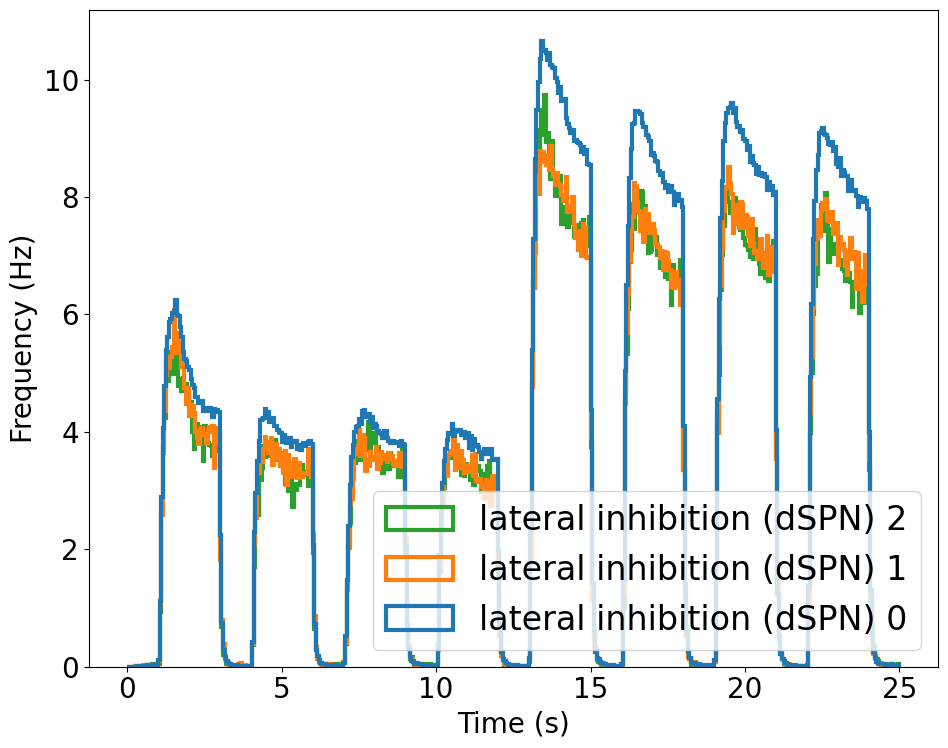

In [13]:
ax_dspn = spr.plot_spike_histogram(label_text="lateral inhibition (dSPN) ", neuron_type="dSPN", show_figure=True, save_figure=True, fig_size=(10,8))

Processing 19587 neurons of type ['iSPN']
Saving figure ../networks/sten_5_SPN_FS_LTS/figures/spike-frequency-pop-units0-1-2.pdf


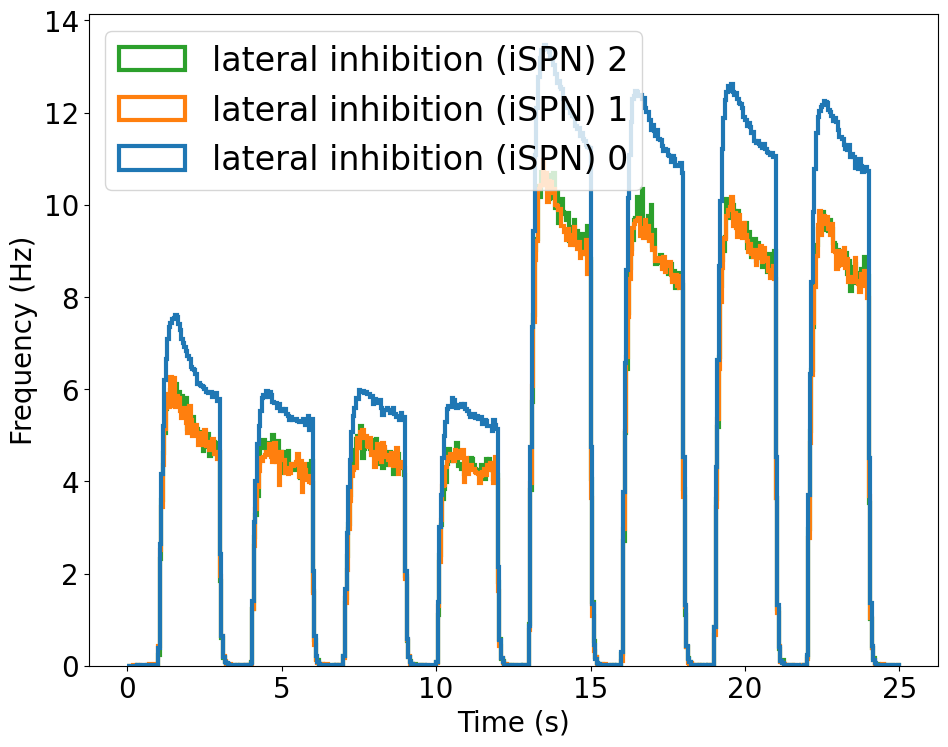

In [14]:
ax_ispn = spr.plot_spike_histogram(label_text="lateral inhibition (iSPN) ", neuron_type="iSPN", show_figure=True, save_figure=True, fig_size=(10,8))

Processing 536 neurons of type ['FS']
Saving figure ../networks/sten_5_SPN_FS_LTS/figures/spike-frequency-pop-units0.pdf


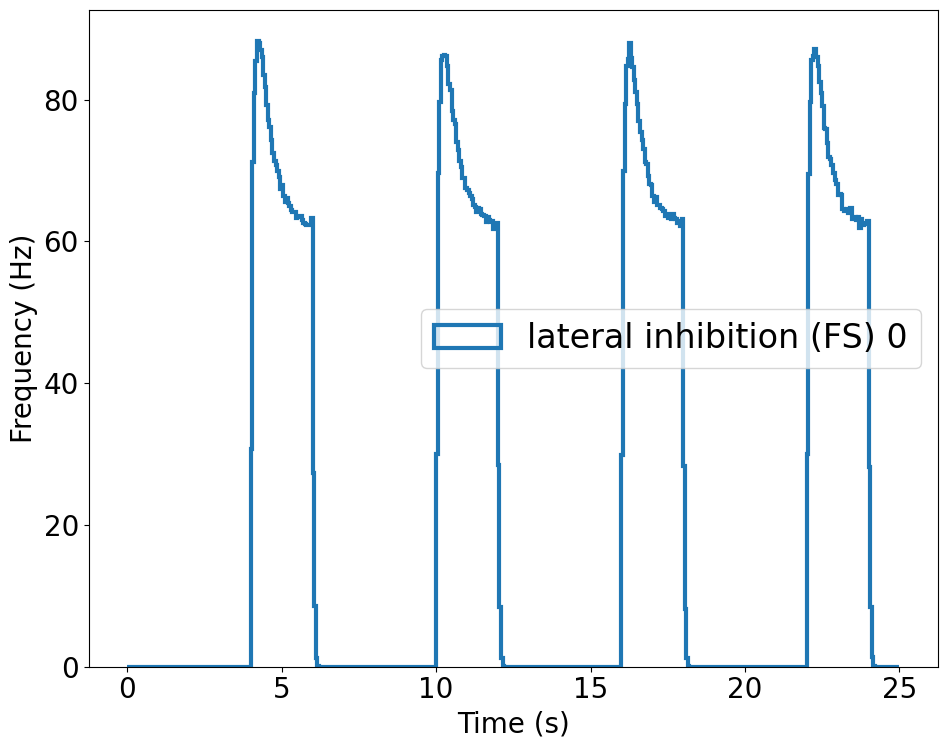

In [15]:
ax_fs = spr.plot_spike_histogram(label_text="lateral inhibition (FS) ", neuron_type="FS", show_figure=True, save_figure=True, fig_size=(10,8))

Processing 288 neurons of type ['LTS']
Saving figure ../networks/sten_5_SPN_FS_LTS/figures/spike-frequency-pop-units0.pdf


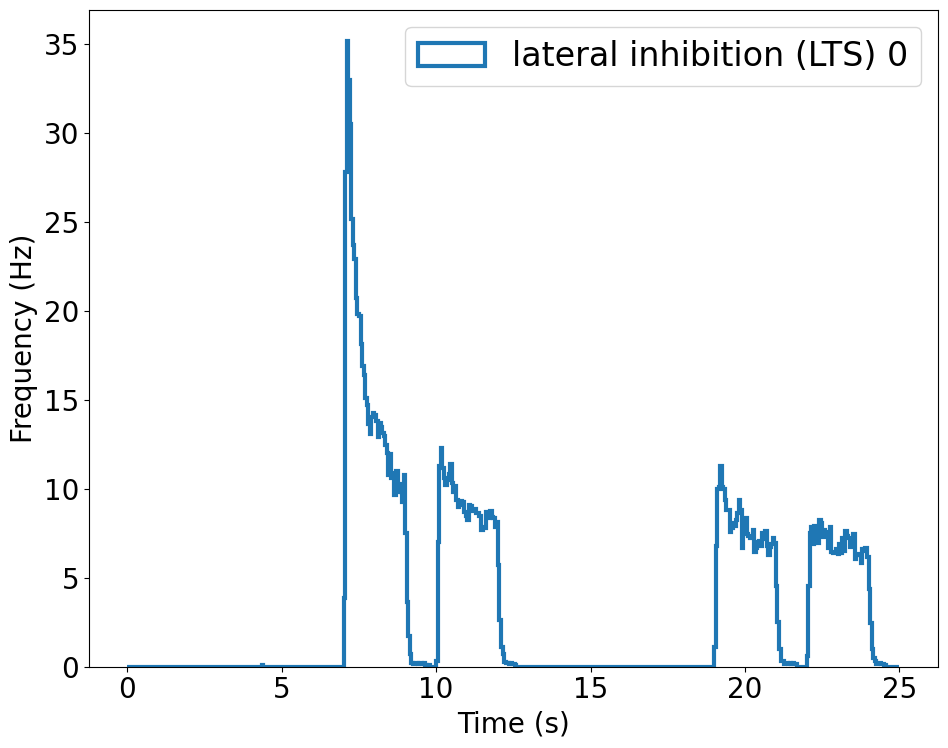

In [16]:
ax_lts = spr.plot_spike_histogram(label_text="lateral inhibition (LTS) ", neuron_type="LTS", show_figure=True, save_figure=True, fig_size=(10,8))